In [73]:

import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
#from wordcloud import WordCloud

In [71]:
df = pd.read_csv("Scaled-VAD.csv", index_col = 0)


In [7]:
df['Joy'] = df['Joy'].replace(['NoJoy'],'Non-Joy')
print(df.tail())

                                                   Tweet         V         A  \
18221  pengepandatante coastlieberian nontoxickids si...  0.244250 -0.309936   
18222                                          happening  0.354000  0.435269   
18223                 chilling sky 360c observation deck  0.424000 -0.152637   
18224                            saw peonies n lost shit -0.712667 -0.606109   
18225                              shoot kill muthafucka -0.856000 -0.421950   

              D      Joy  
18221 -0.321715  Non-Joy  
18222  0.270564  Non-Joy  
18223 -0.161407  Non-Joy  
18224 -0.749957  Non-Joy  
18225 -0.544749  Non-Joy  


In [47]:
#Just Joy Tweets: These are all joy tweets with only the valence and arousal scores
#9113 examples index from 0 to 9112
joy = df.where(df["Joy"] == "Joy")
joy = joy.dropna(axis=0)
joy = joy.reset_index()
joy = joy.drop(columns = ["D", "Joy"])

#Non-Joy Tweets Only
nonjoy = df.where(df["Joy"] == "Non-Joy")
nonjoy = nonjoy.dropna(axis=0)
nonjoy = nonjoy.reset_index()
nonjoy = nonjoy.drop(columns = ["D", "Joy"])

   index                                              Tweet         V  \
0    349                                😎⏳ chicago illinois -1.000000   
1    350                rain rain go away guygoss6 gossowen  0.062667   
2    351               favor abundance peace love happiness  0.809200   
3    352                          srbethanyfsp claro que sí -1.000000   
4    353  chiefrebelle rebelliousval librariesval valsad...  0.969000   

          A  
0 -1.000000  
1 -0.277215  
2  0.119872  
3 -1.000000  
4  0.498668  


In [44]:
# List of valence/arousal for heatmap
va_ar = []
i = 0
while i < len(joy["V"]):
    va_ar.append([joy["V"][i], joy["A"][i]])
    i+=1


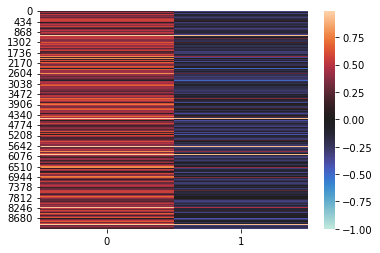

In [45]:
#Is this doing heatmaps correctly?
sns.heatmap(va_ar, center=0)
plt.show()

In [56]:
#Valence/Arousal Averages Across Joy Tweets
avg_va = str(joy["V"].mean())
avg_ar = str(joy["A"].mean())
print("Averages Across Joy Tweets~ " + "Valence: " + avg_va + "; Arousal: "+  avg_ar)

#Valence/Arousal Averages Across Non-Joy Tweets
avg_va_nonjoy = str(nonjoy["V"].mean())
avg_ar_nonjoy = str(nonjoy["A"].mean())
print("Averages Across Non-Joy Tweets~ " + "Valence: " + avg_va_nonjoy + "; Arousal: "+  avg_ar_nonjoy)

Averages Across Joy Tweets~ Valence: 0.42930308815274343; Arousal: -0.12310381374727908
Averages Across Non-Joy Tweets~ Valence: 0.007551378218274622; Arousal: -0.2982417947397152


In [58]:
processed_data = []

for doc in joy["Tweet"]: 
  processed_data.append(doc)

frys social worker mrs paauwe reminding faculty selfcare essential harryefryschool frypossiblility listen encourage joy


In [63]:
vectorizer = CountVectorizer() 

vectors = vectorizer.fit_transform(processed_data)

In [66]:
model = KMeans(n_clusters=10, init='k-means++', max_iter=200, n_init=10)

kmeans_vectors = model.fit_predict(vectors)

In [67]:
#This is for WordCloud but I cannot install package
result={'cluster':kmeans_vectors,'data':processed_data}


result=pd.DataFrame(result)

for k in range(0,10):
   print("Cluster {}\n".format(k))
   s=result[result.cluster==k]
   #text=s['data'].str.cat(sep=' ')
   #text=' '.join([word for word in text.split() if word.lower() not in stopWords])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(s)
  
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

Cluster 0



NameError: name 'WordCloud' is not defined